In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.options.display.max_columns = None

In [34]:
df = pd.read_csv('datos/df_da_relevante.csv', index_col = 0)
df.sample(3)

,age,gender,q3,q4,q6,q7,q8,q9,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q14,q34,q35,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q41
16568,22-24,Man,India,Master’s degree,1-3 years,"Python, SQL, Javascript",Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Matplotlib ,Seaborn ,Plotly / Plotly Express","Microsoft Power BI, Tableau",Microsoft Power BI,NaN,NaN,NaN,NaN,NaN,NaN,Colab,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G..."
980,30-34,Man,Egypt,Master’s degree,< 1 years,Python,SQL,Jupyter Notebook,Kaggle Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Matplotlib ,Seaborn",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2492,30-34,Man,Other,Master’s degree,3-5 years,"Python, R, SQL, Bash",Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Matplotlib ,Seaborn ,Plotly / Plotly Express ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#probamos rename
def renombrar_columnas(dataframe,inicio,final,num_q):
    nom_col = {}
    for col in dataframe.columns[inicio : final+1]:
        try: 
            for i in dataframe[col].unique():
                i = str(i) 
                if i != 'nan':
                    i = i.strip().replace(' ', '_')
                    nom_col[col] = f'q{num_q}_{i}'
                else:
                    pass
        except:
            print('estoy en el except con la columna {col} , elemento {i}')
            
    renombrado = dataframe.rename(columns = nom_col)
    
    return renombrado

In [36]:
df = renombrar_columnas(df, 8, 24, 10)


In [37]:
df.sample(3)

,age,gender,q3,q4,q6,q7,q8,q9,q10_Kaggle_Notebooks,q10_Colab_Notebooks,q10_Azure_Notebooks,q10_Paperspace_/_Gradient,q10_Binder_/_JupyterHub,q10_Code_Ocean,q10_IBM_Watson_Studio,q10_Amazon_Sagemaker_Studio_Notebooks,q10_Amazon_EMR_Notebooks,q10_Google_Cloud_Notebooks_(AI_Platform_/_Vertex_AI),q10_Google_Cloud_Datalab,q10_Databricks_Collaborative_Notebooks,q10_Zeppelin_/_Zepl_Notebooks,q10_Deepnote_Notebooks,q10_Observable_Notebooks,q10_None,q10_Other,q14,q34,q35,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q41
13990,30-34,Man,India,Master’s degree,5-10 years,"Python, SQL",Python,"Visual Studio Code (VSCode) ,PyCharm , Sublime...",Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Matplotlib ,Seaborn","Microsoft Power BI, Tableau",Microsoft Power BI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I do not share my work publicly,NaN,"Business intelligence software (Salesforce, Ta..."
21923,40-44,Man,Japan,Master’s degree,10-20 years,"Python, R, Other",Python,"RStudio , Vim / Emacs,Jupyter Notebook",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,Matplotlib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt..."
18695,40-44,Woman,South Africa,Doctoral degree,3-5 years,R,R,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",Kaggle Notebooks,Colab Notebooks,Azure Notebooks,Paperspace / Gradient,Binder / JupyterHub,Code Ocean,IBM Watson Studio,Amazon Sagemaker Studio Notebooks,Amazon EMR Notebooks,Google Cloud Notebooks (AI Platform / Vertex AI),Google Cloud Datalab,Databricks Collaborative Notebooks,Zeppelin / Zepl Notebooks,Deepnote Notebooks,Observable Notebooks,NaN,NaN,"Matplotlib ,Seaborn ,Plotly / Plotly Express ...","Amazon QuickSight, Microsoft Power BI, Google ...",Tableau CRM,Plotly Dash,Streamlit,NBViewer,GitHub,Personal blog,Kaggle,Colab,Shiny,NaN,NaN,"Local development environments (RStudio, Jupyt..."


In [38]:
df = renombrar_columnas(df, 28, 37, 39)

In [39]:
df.columns

Index(['age', 'gender', 'q3', 'q4', 'q6', 'q7', 'q8', 'q9',
       'q10_Kaggle_Notebooks', 'q10_Colab_Notebooks', 'q10_Azure_Notebooks',
       'q10_Paperspace_/_Gradient', 'q10_Binder_/_JupyterHub',
       'q10_Code_Ocean', 'q10_IBM_Watson_Studio',
       'q10_Amazon_Sagemaker_Studio_Notebooks', 'q10_Amazon_EMR_Notebooks',
       'q10_Google_Cloud_Notebooks_(AI_Platform_/_Vertex_AI)',
       'q10_Google_Cloud_Datalab', 'q10_Databricks_Collaborative_Notebooks',
       'q10_Zeppelin_/_Zepl_Notebooks', 'q10_Deepnote_Notebooks',
       'q10_Observable_Notebooks', 'q10_None', 'q10_Other', 'q14', 'q34',
       'q35', 'q39_Plotly_Dash', 'q39_Streamlit', 'q39_NBViewer', 'q39_GitHub',
       'q39_Personal_blog', 'q39_Kaggle', 'q39_Colab', 'q39_Shiny',
       'q39_I_do_not_share_my_work_publicly', 'q39_Other', 'q41'],
      dtype='object')

In [8]:
#funcion para cambiar los nans
def yes_no(dataframe, inicio, final):
    for col in dataframe.columns[inicio:(final+1)]:
        dataframe[col] = dataframe[col].apply(lambda data: np.where(type(data) != float, 'yes', 'no'))
    return dataframe

In [9]:
df = yes_no(df, 8, 24)

In [10]:
df = yes_no(df, 28, 37)

In [11]:
df.sample(3)

,age,gender,q3,q4,q6,q7,q8,q9,q10_Kaggle_Notebooks,q10_Colab_Notebooks,q10_Azure_Notebooks,q10_Paperspace_/_Gradient,q10_Binder_/_JupyterHub,q10_Code_Ocean,q10_IBM_Watson_Studio,q10_Amazon_Sagemaker_Studio_Notebooks,q10_Amazon_EMR_Notebooks,q10_Google_Cloud_Notebooks_(AI_Platform_/_Vertex_AI),q10_Google_Cloud_Datalab,q10_Databricks_Collaborative_Notebooks,q10_Zeppelin_/_Zepl_Notebooks,q10_Deepnote_Notebooks,q10_Observable_Notebooks,q10_None,q10_Other,q14,q34,q35,q39_Plotly_Dash,q39_Streamlit,q39_NBViewer,q39_GitHub,q39_Personal_blog,q39_Kaggle,q39_Colab,q39_Shiny,q39_I_do_not_share_my_work_publicly,q39_Other,q41
11174,25-29,Man,United States of America,Doctoral degree,1-3 years,"Python, R",Python,"RStudio ,Jupyter Notebook",yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,"Matplotlib ,Seaborn ,Plotly / Plotly Express ...",Tableau,NaN,no,no,no,yes,no,yes,no,no,no,no,"Local development environments (RStudio, Jupyt..."
6109,40-44,Man,United States of America,Master’s degree,3-5 years,"Python, R, SQL",Python,"RStudio ,Visual Studio Code (VSCode) ,PyCharm",no,no,no,no,no,no,no,no,yes,no,yes,no,no,no,no,no,no,Matplotlib,Tableau,NaN,no,no,no,no,no,no,no,no,no,no,NaN
15720,22-24,Man,Sri Lanka,Bachelor’s degree,< 1 years,"Python, Java",Python,Jupyter Notebook,yes,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,"Matplotlib ,Seaborn ,Ggplot / ggplot2","Microsoft Power BI, Microsoft Azure Synapse",Microsoft Power BI,no,no,no,no,no,no,no,no,no,no,NaN


In [12]:
df.isnull().sum().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
index,age,gender,q3,q4,q6,q7,q8,q9,q10_Kaggle_Notebooks,q10_Colab_Notebooks,q10_Azure_Notebooks,q10_Paperspace_/_Gradient,q10_Binder_/_JupyterHub,q10_Code_Ocean,q10_IBM_Watson_Studio,q10_Amazon_Sagemaker_Studio_Notebooks,q10_Amazon_EMR_Notebooks,q10_Google_Cloud_Notebooks_(AI_Platform_/_Vert...,q10_Google_Cloud_Datalab,q10_Databricks_Collaborative_Notebooks,q10_Zeppelin_/_Zepl_Notebooks,q10_Deepnote_Notebooks,q10_Observable_Notebooks,q10_None,q10_Other,q14,q34,q35,q39_Plotly_Dash,q39_Streamlit,q39_NBViewer,q39_GitHub,q39_Personal_blog,q39_Kaggle,q39_Colab,q39_Shiny,q39_I_do_not_share_my_work_publicly,q39_Other,q41
0,0,0,0,0,0,143,144,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,193,1069,1858,0,0,0,0,0,0,0,0,0,0,533


In [13]:
q7_responses = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB', 'None', 'Other']

In [14]:
# def sacar_herramienta(col):
    
#     try:
#         if re.findall(patron, col):
#             return 'yes'
#         else:
#             return 'no'
#     except:
#         return 'unknown'


In [15]:
def sacar_herramienta(col):
    
    try:
        if re.findall(patron, col):
            return 1
        else:
            return 0
    except:
        return np.nan

In [16]:
for patron in q7_responses:
    df[f'q7_{patron}'] = df['q7'].apply(sacar_herramienta)

df.drop(columns = 'q7', inplace = True)

In [17]:
df.head(2)

,age,gender,q3,q4,q6,q8,q9,q10_Kaggle_Notebooks,q10_Colab_Notebooks,q10_Azure_Notebooks,q10_Paperspace_/_Gradient,q10_Binder_/_JupyterHub,q10_Code_Ocean,q10_IBM_Watson_Studio,q10_Amazon_Sagemaker_Studio_Notebooks,q10_Amazon_EMR_Notebooks,q10_Google_Cloud_Notebooks_(AI_Platform_/_Vertex_AI),q10_Google_Cloud_Datalab,q10_Databricks_Collaborative_Notebooks,q10_Zeppelin_/_Zepl_Notebooks,q10_Deepnote_Notebooks,q10_Observable_Notebooks,q10_None,q10_Other,q14,q34,q35,q39_Plotly_Dash,q39_Streamlit,q39_NBViewer,q39_GitHub,q39_Personal_blog,q39_Kaggle,q39_Colab,q39_Shiny,q39_I_do_not_share_my_work_publicly,q39_Other,q41,q7_Python,q7_R,q7_SQL,q7_C,q7_C++,q7_Java,q7_Javascript,q7_Julia,q7_Swift,q7_Bash,q7_MATLAB,q7_None,q7_Other
16,50-54,Man,Belgium,Bachelor’s degree,20+ years,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",yes,yes,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,"Matplotlib ,Seaborn ,Plotly / Plotly Express",NaN,NaN,no,no,no,no,no,no,no,no,no,no,"Local development environments (RStudio, Jupyt...",1.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,22-24,Nonbinary,United States of America,Some college/university study without earning ...,< 1 years,R,RStudio,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,Ggplot / ggplot2,NaN,NaN,no,no,no,no,no,no,no,no,no,no,NaN,0.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
q9_responses = ['JupyterLab', 'RStudio', 'Visual Studio', 'Visual Studio Code (VSCode)', 'PyCharm', 'Spyder', 'Notepad++', 'Sublime Text', 'Vim, Emacs or similar', 'MATLAB', 'Jupyter Notebook', 'None', 'Other']

In [19]:
for patron in q9_responses:
    df[f'q9_{patron}'] = df['q9'].apply(sacar_herramienta)
df.drop(columns = 'q9', inplace = True)

In [20]:
q14_responses = ['Seaborn', 'Plotly / Plotly Express', 'Ggplot / ggplot2', 'Shiny', 'D3 js', 'Altair', 'Bokeh', 'Geoplotlib', 'Leaflet / Folium', 'None', 'Other']
for patron in q14_responses:
    df[f'q14_{patron}'] = df['q14'].apply(sacar_herramienta)

df.drop(columns = 'q14', inplace = True)

In [21]:
q41_responses = ['Basic statistical software (Microsoft Excel, Google Sheets, etc.)', 'Advanced statistical software (SPSS, SAS, etc.)', 
                 'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)', 'Local development environments (RStudio, JupyterLab, etc.)', 
                 'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)', 'Other']
for patron in q14_responses:
    df[f'q41_{patron}'] = df['q41'].apply(sacar_herramienta)

df.drop(columns = 'q41', inplace = True)

In [22]:
df.sample(3)

,age,gender,q3,q4,q6,q8,q10_Kaggle_Notebooks,q10_Colab_Notebooks,q10_Azure_Notebooks,q10_Paperspace_/_Gradient,q10_Binder_/_JupyterHub,q10_Code_Ocean,q10_IBM_Watson_Studio,q10_Amazon_Sagemaker_Studio_Notebooks,q10_Amazon_EMR_Notebooks,q10_Google_Cloud_Notebooks_(AI_Platform_/_Vertex_AI),q10_Google_Cloud_Datalab,q10_Databricks_Collaborative_Notebooks,q10_Zeppelin_/_Zepl_Notebooks,q10_Deepnote_Notebooks,q10_Observable_Notebooks,q10_None,q10_Other,q34,q35,q39_Plotly_Dash,q39_Streamlit,q39_NBViewer,q39_GitHub,q39_Personal_blog,q39_Kaggle,q39_Colab,q39_Shiny,q39_I_do_not_share_my_work_publicly,q39_Other,q7_Python,q7_R,q7_SQL,q7_C,q7_C++,q7_Java,q7_Javascript,q7_Julia,q7_Swift,q7_Bash,q7_MATLAB,q7_None,q7_Other,q9_JupyterLab,q9_RStudio,q9_Visual Studio,q9_Visual Studio Code (VSCode),q9_PyCharm,q9_Spyder,q9_Notepad++,q9_Sublime Text,"q9_Vim, Emacs or similar",q9_MATLAB,q9_Jupyter Notebook,q9_None,q9_Other,q14_Seaborn,q14_Plotly / Plotly Express,q14_Ggplot / ggplot2,q14_Shiny,q14_D3 js,q14_Altair,q14_Bokeh,q14_Geoplotlib,q14_Leaflet / Folium,q14_None,q14_Other,q41_Seaborn,q41_Plotly / Plotly Express,q41_Ggplot / ggplot2,q41_Shiny,q41_D3 js,q41_Altair,q41_Bokeh,q41_Geoplotlib,q41_Leaflet / Folium,q41_None,q41_Other
9346,25-29,Man,Colombia,Master’s degree,1-3 years,Python,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,NaN,NaN,no,no,no,no,no,no,no,no,no,no,1.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17005,25-29,Man,Nigeria,Bachelor’s degree,1-3 years,SQL,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,"Microsoft Power BI, Tableau",Microsoft Power BI,no,no,no,no,no,yes,no,no,no,no,1.0,0.0,1.0,0.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24303,25-29,Woman,Poland,Master’s degree,5-10 years,Python,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,None,NaN,no,no,no,yes,no,no,yes,no,no,no,1.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
orden = ['age', 'gender', 'q3', 'q4', 'q6', 'q7_Python', 'q7_R', 'q7_SQL', 'q7_C', 'q7_C++', 'q7_Java', 'q7_Javascript', 'q7_Julia','q7_Swift', 'q7_Bash', 'q7_MATLAB', 
         'q7_None', 'q7_Other','q8', 'q9_JupyterLab', 'q9_RStudio', 'q9_Visual Studio','q9_Visual Studio Code (VSCode)', 'q9_PyCharm', 'q9_Spyder','q9_Notepad++', 
         'q9_Sublime Text', 'q9_Vim, Emacs or similar', 'q9_MATLAB', 'q9_Jupyter Notebook', 'q9_None', 'q9_Other','q10_Kaggle_Notebooks','q10_Colab_Notebooks', 'q10_Azure_Notebooks',
         'q10_Paperspace_/_Gradient', 'q10_Binder_/_JupyterHub', 'q10_Code_Ocean', 'q10_IBM_Watson_Studio', 'q10_Amazon_Sagemaker_Studio_Notebooks', 'q10_Amazon_EMR_Notebooks',
         'q10_Google_Cloud_Notebooks_(AI_Platform_/_Vertex_AI)', 'q10_Google_Cloud_Datalab', 'q10_Databricks_Collaborative_Notebooks', 'q10_Zeppelin_/_Zepl_Notebooks', 'q10_Deepnote_Notebooks',
         'q10_Observable_Notebooks', 'q10_None', 'q10_Other', 'q14_Seaborn', 'q14_Plotly / Plotly Express', 'q14_Ggplot / ggplot2', 'q14_Shiny', 'q14_D3 js', 'q14_Altair', 'q14_Bokeh', 
         'q14_Geoplotlib','q14_Leaflet / Folium', 'q14_None', 'q14_Other','q34', 'q35', 'q39_Plotly_Dash', 'q39_Streamlit', 'q39_NBViewer', 'q39_GitHub', 'q39_Personal_blog', 'q39_Kaggle', 
         'q39_Colab', 'q39_Shiny', 'q39_I_do_not_share_my_work_publicly', 'q39_Other', 'q41_Seaborn', 'q41_Plotly / Plotly Express', 'q41_Ggplot / ggplot2', 'q41_Shiny', 'q41_D3 js', 
         'q41_Altair', 'q41_Bokeh', 'q41_Geoplotlib', 'q41_Leaflet / Folium', 'q41_None', 'q41_Other']

In [24]:
df = df.reindex(columns = orden)

In [25]:
df.sample()

,age,gender,q3,q4,q6,q7_Python,q7_R,q7_SQL,q7_C,q7_C++,q7_Java,q7_Javascript,q7_Julia,q7_Swift,q7_Bash,q7_MATLAB,q7_None,q7_Other,q8,q9_JupyterLab,q9_RStudio,q9_Visual Studio,q9_Visual Studio Code (VSCode),q9_PyCharm,q9_Spyder,q9_Notepad++,q9_Sublime Text,"q9_Vim, Emacs or similar",q9_MATLAB,q9_Jupyter Notebook,q9_None,q9_Other,q10_Kaggle_Notebooks,q10_Colab_Notebooks,q10_Azure_Notebooks,q10_Paperspace_/_Gradient,q10_Binder_/_JupyterHub,q10_Code_Ocean,q10_IBM_Watson_Studio,q10_Amazon_Sagemaker_Studio_Notebooks,q10_Amazon_EMR_Notebooks,q10_Google_Cloud_Notebooks_(AI_Platform_/_Vertex_AI),q10_Google_Cloud_Datalab,q10_Databricks_Collaborative_Notebooks,q10_Zeppelin_/_Zepl_Notebooks,q10_Deepnote_Notebooks,q10_Observable_Notebooks,q10_None,q10_Other,q14_Seaborn,q14_Plotly / Plotly Express,q14_Ggplot / ggplot2,q14_Shiny,q14_D3 js,q14_Altair,q14_Bokeh,q14_Geoplotlib,q14_Leaflet / Folium,q14_None,q14_Other,q34,q35,q39_Plotly_Dash,q39_Streamlit,q39_NBViewer,q39_GitHub,q39_Personal_blog,q39_Kaggle,q39_Colab,q39_Shiny,q39_I_do_not_share_my_work_publicly,q39_Other,q41_Seaborn,q41_Plotly / Plotly Express,q41_Ggplot / ggplot2,q41_Shiny,q41_D3 js,q41_Altair,q41_Bokeh,q41_Geoplotlib,q41_Leaflet / Folium,q41_None,q41_Other
5875,30-34,Man,Russia,Master’s degree,1-3 years,1.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Python,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,no,yes,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Microsoft Power BI, Tableau",Microsoft Power BI,yes,yes,no,yes,no,no,yes,no,no,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df_q7 = df[df.columns[5:18]]

In [27]:
q7_count = df_q7.sum().reset_index()

In [28]:
q7_count.columns = ['herramienta', 'conteo']

In [29]:
q7_count

,herramienta,conteo
0,q7_Python,1804.0
1,q7_R,715.0
2,q7_SQL,1399.0
3,q7_C,280.0
4,q7_C++,0.0
5,q7_Java,358.0
6,q7_Javascript,229.0
7,q7_Julia,13.0
8,q7_Swift,13.0
9,q7_Bash,102.0


<AxesSubplot:xlabel='conteo', ylabel='herramienta'>

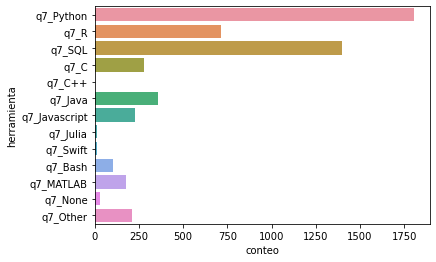

In [30]:
sns.barplot(y = 'herramienta', x= 'conteo', data = q7_count)

In [31]:
sns.barplot(y = 'herramienta', x = ,hue = 'gender', data = df)

SyntaxError: invalid syntax (555192003.py, line 1)

In [ ]:
for col in df.columns[5:18]:
    print(f'{col}')
    display(df[col].value_counts().reset_index())

q7_Python


,index,q7_Python
0,1.0,1804
1,0.0,354


q7_R


,index,q7_R
0,0.0,1443
1,1.0,715


q7_SQL


,index,q7_SQL
0,1.0,1399
1,0.0,759


q7_C


,index,q7_C
0,0.0,1878
1,1.0,280


q7_C++


,index,q7_C++


q7_Java


,index,q7_Java
0,0.0,1800
1,1.0,358


q7_Javascript


,index,q7_Javascript
0,0.0,1929
1,1.0,229


q7_Julia


,index,q7_Julia
0,0.0,2145
1,1.0,13


q7_Swift


,index,q7_Swift
0,0.0,2145
1,1.0,13


q7_Bash


,index,q7_Bash
0,0.0,2056
1,1.0,102


q7_MATLAB


,index,q7_MATLAB
0,0.0,1981
1,1.0,177


q7_None


,index,q7_None
0,0.0,2126
1,1.0,32


q7_Other


,index,q7_Other
0,0.0,1945
1,1.0,213
